In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import glob
import os

import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6]
import matplotlib.pyplot as plt

import utils
from add_fourier import get_fourier_fn

In [3]:
def read_file(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    df = pd.DataFrame.from_dict(data['data'])
    df.sort_values('lon', inplace=True)
    return df

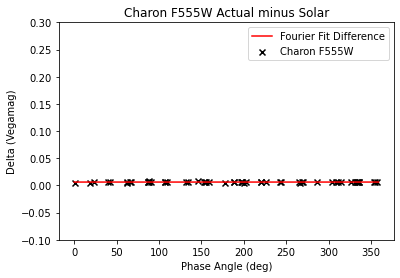

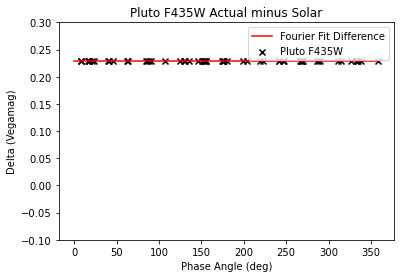

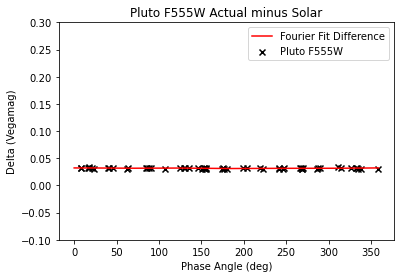

In [10]:
def show_spec_diff(data_file):
    target, bandpass = data_file.split("_")
    target = target.capitalize()
    bandpass = f"F{bandpass}W"
    plt.title(f"{target} {bandpass} Actual minus Solar")

    df = read_file(f"output/{data_file}.json")
    solar_df = read_file(f"output/{data_file}_solar.json")


    plt.scatter(df.lon, df.multi_vegamag - solar_df.multi_vegamag, 
                 marker='x', c='black',
                 label=f"{target} {bandpass}")

    # Fits
    fit_x = np.arange(360)
    fit_y = get_fourier_fn(f"output/{data_file}.json")(fit_x)
    
    fit_y_solar = get_fourier_fn(f"output/{data_file}_solar.json")(fit_x)
    plt.plot(fit_x, fit_y - fit_y_solar, c="red", label="Fourier Fit Difference")

    plt.xlabel("Phase Angle (deg)")
    plt.ylabel("Delta (Vegamag)")
    plt.ylim([-.1, 0.3])
    plt.legend()
    figname = data_file + '_buie_delta.jpg'
    plt.savefig(figname, bbox_inches='tight')
    plt.show()

    
# show_err("charon_435")
show_spec_diff("charon_555")
show_spec_diff("pluto_435")
show_spec_diff("pluto_555")